In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('C:\\Users\\Dell\\Desktop\\spam_dataset.xlsx')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

                                        Check percentage of missing columns

In [6]:
# Check percentage of Unnamed: 2

print('Unnamed: 2:',data['Unnamed: 2'].isnull().sum()/len(data['Unnamed: 2'])*100)  
print('Unnamed: 3:',data['Unnamed: 3'].isnull().sum()/len(data['Unnamed: 3'])*100)
print('Unnamed: 4:',data['Unnamed: 4'].isnull().sum()/len(data['Unnamed: 4'])*100)

Unnamed: 2: 99.10265613783201
Unnamed: 3: 99.78463747307968
Unnamed: 4: 99.89231873653985


Remove Unnamed: 2, Unnamed: 3 and Unnamed: 4 columns from the dataset because of 99% data is missing.

In [7]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Add length column of v2 

In [8]:
data['v2_length']=data['v2'].str.len()

In [9]:
data.head()

,v1,v2,v2_length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


Check the target variable is balanced or not, so this is an imbalanced dataset

In [10]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

                                               Check duplicacy

In [11]:
data[data['v2'].duplicated()]

,v1,v2,v2_length
102,ham,As per your request 'Melle Melle (Oru Minnamin...,160.0
153,ham,As per your request 'Melle Melle (Oru Minnamin...,160.0
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",156.0
222,ham,"Sorry, I'll call later",22.0
325,ham,No calls..messages..missed calls,32.0
...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,153.0
5535,ham,"I know you are thinkin malaria. But relax, chi...",329.0
5539,ham,Just sleeping..and surfing,26.0
5553,ham,Hahaha..use your brain dear,27.0


There are four hundred three rows which are duplicated, so we delete those rows otherwise it biased our dataset.

In [12]:
data=data.drop_duplicates()

In [13]:
data.reset_index()

data.head()

,v1,v2,v2_length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


In [14]:
data.shape

(5169, 3)

In [15]:
data.isnull().sum()

v1           0
v2           0
v2_length    1
dtype: int64

In [16]:
data['v2_length']=data['v2_length'].fillna(data['v2_length'].mode()[0])

                                    Remove unneccessary words in the rows

In [17]:
data['v2']=data['v2'].str.lower()

data['v2']=data['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','')

data['v2'] = data['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','')

data['v2'] = data['v2'].str.replace(r'£|\$', '')

data['v2'] = data['v2'].str.replace(r'\d+(\.\d+)?', '')

In [18]:
# remove stopwords

stop= stopwords.words('english')

data['v2'] = data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [19]:
# remove punctuation

data['v2'] = data['v2'].str.strip().str.replace('[^\w\s]', '')

# Data Visualisation

ham     4516
spam     653
Name: v1, dtype: int64


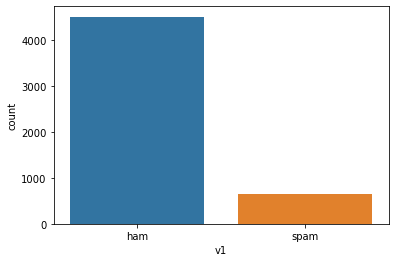

In [20]:
ax= sns.countplot(x='v1',data=data)
print(data['v1'].value_counts())

<AxesSubplot:xlabel='v2_length', ylabel='Density'>

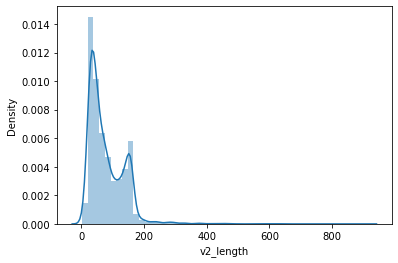

In [21]:
sns.distplot(data['v2_length'])

                                        Encoding Technique

In [22]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [23]:
data.head()

,v1,v2,v2_length
0,0.0,1047.0,111.0
1,0.0,3182.0,29.0
2,1.0,939.0,155.0
3,0.0,4187.0,49.0
4,0.0,2807.0,61.0


# Data Analysis

In [24]:
data.describe()

,v1,v2,v2_length
count,5169.000000,5168.000000,5169.000000
mean,0.126330,2553.205108,78.983943
std,0.332253,1475.652003,58.235207
min,0.000000,0.000000,2.000000
25%,0.000000,1270.750000,36.000000
50%,0.000000,2557.500000,60.000000
75%,0.000000,3828.250000,117.000000
max,1.000000,5103.000000,910.000000


<AxesSubplot:>

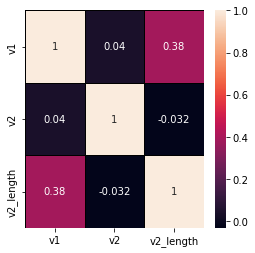

In [25]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

In [26]:
data['v2_length'].skew()

2.6104318921950362

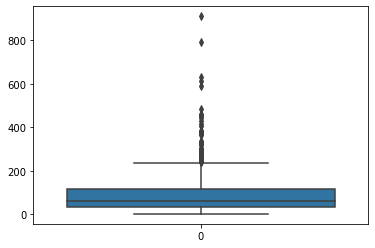

In [26]:
ax = sns.boxplot(data=data['v2_length'])

v2_length is positively skewed and also have an ouliers

                                          Removing outliers

In [27]:
q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1

In [28]:
v2_len_high = (q3.v2_length + (1.5 * iqr.v2_length))
print(v2_len_high)

index = np.where(data['v2_length'] > v2_len_high)

data = data.drop(data.index[index])
print(data.shape)

238.5
(5103, 3)


In [29]:
data.head()

,v1,v2,v2_length
0,0.0,1047.0,111.0
1,0.0,3182.0,29.0
2,1.0,939.0,155.0
3,0.0,4187.0,49.0
4,0.0,2807.0,61.0


# Data Modeling

In [40]:
x=data.drop(['v1'],axis=1)
y=data['v1']

                                            Logistic Regression

In [41]:
lr=LogisticRegression()

In [42]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 86.75441052926351
Testing accuracy score: 86.74069235793598


random state 1
Training accuracy score: 86.47437692523103
Testing accuracy score: 87.52449379490528


random state 2
Training accuracy score: 86.61439372724728
Testing accuracy score: 87.91639451338995


random state 3
Training accuracy score: 87.48249789974797
Testing accuracy score: 86.41410842586545


random state 4
Training accuracy score: 86.75441052926351
Testing accuracy score: 86.61005878510777


random state 5
Training accuracy score: 87.20246429571549
Testing accuracy score: 86.54474199869367


random state 6
Training accuracy score: 87.34248109773173
Testing accuracy score: 87.06727629000653


random state 7
Training accuracy score: 86.50238028563427
Testing accuracy score: 88.89614630960156


random state 8
Training accuracy score: 87.76253150378045
Testing accuracy score: 86.67537557152188


random state 9
Training accuracy score: 87.146457574909
Testing accuracy score: 86

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=15) 

In [44]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 87.13259307642063


In [45]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[1289   40]
 [ 157   45]]


In [46]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1329
         1.0       0.53      0.22      0.31       202

    accuracy                           0.87      1531
   macro avg       0.71      0.60      0.62      1531
weighted avg       0.84      0.87      0.85      1531



In [47]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

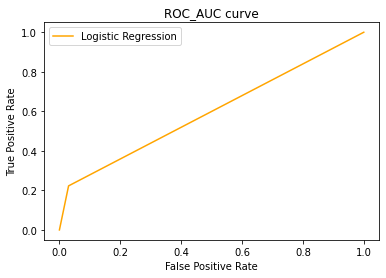

AUC_score 59.633722965976055


In [48]:
plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

                                               K Neighbors Classifier

In [49]:
knn= KNeighborsClassifier()

In [50]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 93.9792775133016
Testing accuracy score: 91.90071848465055


random state 1
Training accuracy score: 93.75525063007561
Testing accuracy score: 92.2273024167211


random state 2
Training accuracy score: 94.06328759451135
Testing accuracy score: 91.18223383409536


random state 3
Training accuracy score: 93.75525063007561
Testing accuracy score: 91.5088177661659


random state 4
Training accuracy score: 93.92327079249509
Testing accuracy score: 91.11691704768126


random state 5
Training accuracy score: 94.11929431531783
Testing accuracy score: 91.57413455258


random state 6
Training accuracy score: 93.9792775133016
Testing accuracy score: 91.57413455258


random state 7
Training accuracy score: 93.64323718846262
Testing accuracy score: 93.59895493141738


random state 8
Training accuracy score: 93.86726407168861
Testing accuracy score: 91.4435009797518


random state 9
Training accuracy score: 93.9792775133016
Testing accuracy score: 91.704768125

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=7) 

In [52]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 93.59895493141738


In [53]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[1307   49]
 [  49  126]]


In [54]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1356
         1.0       0.72      0.72      0.72       175

    accuracy                           0.94      1531
   macro avg       0.84      0.84      0.84      1531
weighted avg       0.94      0.94      0.94      1531



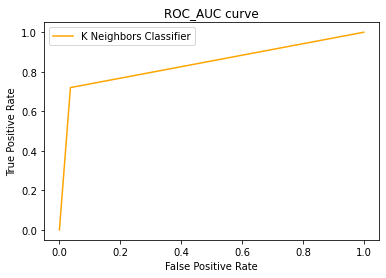

AUC_score 84.19321533923303


In [55]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

                                              Random Forest Classifier

In [56]:
rfc=RandomForestClassifier()

In [57]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 99.97199663959675
Testing accuracy score: 91.83540169823645


random state 1
Training accuracy score: 100.0
Testing accuracy score: 93.0764206401045


random state 2
Training accuracy score: 99.97199663959675
Testing accuracy score: 90.98628347485304


random state 3
Training accuracy score: 100.0
Testing accuracy score: 91.18223383409536


random state 4
Training accuracy score: 99.97199663959675
Testing accuracy score: 92.2273024167211


random state 5
Training accuracy score: 100.0
Testing accuracy score: 91.24755062050947


random state 6
Training accuracy score: 100.0
Testing accuracy score: 90.98628347485304


random state 7
Training accuracy score: 100.0
Testing accuracy score: 92.88047028086218


random state 8
Training accuracy score: 99.9439932791935
Testing accuracy score: 91.77008491182234


random state 9
Training accuracy score: 100.0
Testing accuracy score: 91.31286740692359


random state 10
Training accuracy score: 100.0
Testing 

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=14)

In [59]:
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 93.20705421293273


In [60]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[1304   47]
 [  57  123]]


In [61]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1351
         1.0       0.72      0.68      0.70       180

    accuracy                           0.93      1531
   macro avg       0.84      0.82      0.83      1531
weighted avg       0.93      0.93      0.93      1531



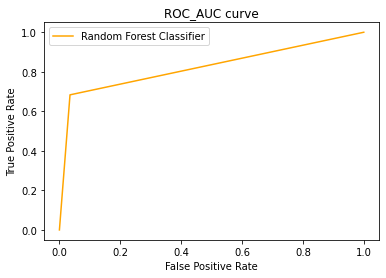

AUC_score 82.4272144090797


In [62]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

                                            MultinomialNB

In [73]:
mb=MultinomialNB()

In [74]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    mb.fit(x_train,y_train)
    pred_train=mb.predict(x_train)
    pred_test=mb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 65.77989358723046
Testing accuracy score: 63.74918354016982


random state 1
Training accuracy score: 64.68776253150378
Testing accuracy score: 65.57805355976485


random state 2
Training accuracy score: 64.68776253150378
Testing accuracy score: 65.31678641410844


random state 3
Training accuracy score: 65.49985998319798
Testing accuracy score: 63.55323318092749


random state 4
Training accuracy score: 66.08793055166619
Testing accuracy score: 62.90006531678641


random state 5
Training accuracy score: 65.19182301876225
Testing accuracy score: 64.4023514043109


random state 6
Training accuracy score: 64.63175581069729
Testing accuracy score: 64.85956890920967


random state 7
Training accuracy score: 64.3517222066648
Testing accuracy score: 66.36185499673417


random state 8
Training accuracy score: 64.91178941472977
Testing accuracy score: 64.53298497713914


random state 9
Training accuracy score: 64.43573228787454
Testing accuracy score: 66

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=22)

In [76]:
mb.fit(x_train,y_train)
y_pred4 = mb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 64.85956890920967


In [77]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[871 458]
 [ 80 122]]


In [78]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

         0.0       0.92      0.66      0.76      1329
         1.0       0.21      0.60      0.31       202

    accuracy                           0.65      1531
   macro avg       0.56      0.63      0.54      1531
weighted avg       0.82      0.65      0.70      1531



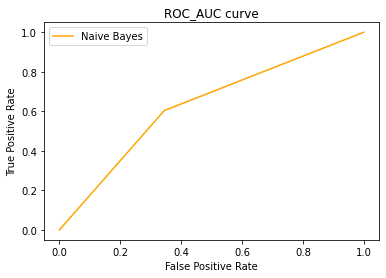

AUC_score 62.967019049534755


In [79]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

We worked on different different models, and we get that K Neighbors classifier is the better model for this problem.

                                             Save the file

In [81]:
import joblib

joblib.dump(y_pred2,"Email_spam_classifier.pkl")

['Email_spam_classifier.pkl']

# Conclusion

In [82]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred2})
Prediction

,Actual data,Predicted data
3591,0.0,0.0
415,0.0,0.0
93,1.0,0.0
1380,0.0,0.0
3192,0.0,0.0
...,...,...
1460,0.0,0.0
3205,0.0,0.0
5116,0.0,0.0
1351,0.0,0.0
